<a href="https://colab.research.google.com/github/rajagopalmotivate/MLinQuantamScience/blob/main/Nandri_Nandri_DM21_DistributeCompute_ver_J102_11_Jun_2022_WORKS_Well_by_Gods_Grace_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple comparision of DFT vs NN 
## Hypothesis: NN performs as good as DFT for simple atoms
## Experiment: Compare for 10 elements with 10 basis set

In [89]:
EXPNO ='EXP_1200'

In [90]:
elementname ='N' 
dictPeriodicTable = {'N': 7}


In [91]:
EXPNO = EXPNO + 'Mol ' +elementname

In [92]:
firstTimeorRestart = True

In [93]:
listBasisSet = ['6-21g' , 'cc-pvqz' , 'def2-qzvp'  ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-21g']

listBasisSet = ['cc-pCVDZ' , 'def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-31g', 'STO-3G' , 'def2-QZVPPD' ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ', 'cc-pVQZ' , 'cc-pVXZ', 'aug-cc-pV(Q+d)Z' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVTZ',  'cc-pVXZ' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVQZ'  ]

listBasisSet = [  'cc-pV7Z', 'cc-pV6Z',  'cc-pVQZ' , 'cc-pVDZ' , 'cc-pCVQZ',    'def2-QZVP', 'def2-7CVPPD', '6-31g' ,'STO-3G'   ]

listBasisSet = [  'cc-pV7Z', 'cc-pV6Z' , 'cc-pVQZ' , 'cc-pCVQZ', 'cc-pVDZ'   ]

listBasisSet = [  'cc-pVQZ' , 'cc-pCVQZ', 'cc-pVDZ'  ,  'cc-pV6Z' , 'cc-pV7Z' ]

listBasisSet = [  'cc-pVQZ' ]

#listBasisSet = [   'cc-pVQZ', 'def2-QZVP']
 

basis set? how to choose it https://www.youtube.com/watch?v=irQ_c_fW5f8&t=1707s

In [94]:
#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 }

#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 , 'Na':11, 'Mg':12 , 'Al':13, 'Si':14, 'P':15, 'S':16 , 'Cl':17, 'Ar':18}


  
dictPeriodicTableSpinValues = {'H': 1,  'He': 0, 'Li': 1, 'Be': 0, 'B': 1, 'C': 0, 'N': 1, 'O': 0, 'F': 1, 'Ne': 0 }



print(str( 'Weight'  + ' ' +   ' \t Element     \t  SPIN'    ))
 
 
  


Weight  	 Element     	  SPIN


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Install

In [96]:
#!pip install git+git://github.com/deepmind/deepmind-research.git#subdirectory=density_functional_approximation_dm21

In [97]:
!git clone https://github.com/deepmind/deepmind-research.git


fatal: destination path 'deepmind-research' already exists and is not an empty directory.


In [98]:
cd deepmind-research/density_functional_approximation_dm21


/content/deepmind-research/density_functional_approximation_dm21/deepmind-research/density_functional_approximation_dm21


In [99]:
pwd

'/content/deepmind-research/density_functional_approximation_dm21/deepmind-research/density_functional_approximation_dm21'

In [100]:
!pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/deepmind-research/density_functional_approximation_dm21/deepmind-research/density_functional_approximation_dm21
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for density-functional-approximation-dm21: filename=density_functional_approximation_dm21-0.1-py3-none-any.whl size=6085418 sha256=679439228fd3ad802088f55095462dec66c8e21dd2e257b3d49809b6d4ed473a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4lqqzivg/wheels/87/39/93/360a00f6325ba11870ada6636e8cc42510b4b1706662ae29b5
Successfully built density-function

## Step 2: Test run a sample DFT calculation

In [101]:
from pyscf import gto
from pyscf import dft

from pyscf import __config__
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

122546

In [102]:
import psutil
systemresources = psutil.virtual_memory()

MAX_MEMORY = round( systemresources.available  * 0.00001)
PYSCF_MAX_MEMORY  = MAX_MEMORY

print('Configured to use max RAM resources of  ' + str(MAX_MEMORY))

Configured to use max RAM resources of  109431


In [103]:
setattr(__config__, 'MAX_MEMORY', PYSCF_MAX_MEMORY)

setattr(__config__, 'PYSCF_MAX_MEMORY', PYSCF_MAX_MEMORY)



In [104]:
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

109431

## Step 3: Attention NIRMALA:  Try it out!

### 3.1 Define the periodic table (Define atomic weight and periodic weight for each element)

### 3.2 Define the spin value for each element 

### 3.3 You can load any new basis function.  Just visit the Basics Exchange and get a new Basis Function URL .  
#### here we download a basis set full defintion file from an URL and then use it to construct a molecule  

#### To get a web URL, just visit https://www.basissetexchange.org/


http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf 

https://youtu.be/irQ_c_fW5f8?t=971


1.   cc-pCVXZ or aug-cc-pCVXZ basis sets;  you should use basis sets like this if you do not freeze core
2.   cc-pVQZ is great for CCSD(T)



In [105]:
def trydownloadingBasisSet(ElementsinMolecule, BasisSet, versionno):  
    target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionno)+'&elements=' + str(ElementsinMolecule) 
    #print(target_url)
    try:
      textfile = urllib.request.urlopen(target_url)    
      mydownloadedfile = ""
      for line in textfile:
          #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
          mydownloadedfile += line.decode('utf-8') 
      return True    
    except:
      return False

In [106]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff


def getValidBasisSet(MoleculeList):
  ValidatedBasisSet = []
  ValBSSetVersionNumberDict = {}
  errorproneBasisSet = []
  for BasisSet in listBasisSet:
    didnotworkatallforanyversion = True
    for versionno in range(0,4):
      isworking = trydownloadingBasisSet(MoleculeList, BasisSet, versionno)
      if isworking == True:
        didnotworkatallforanyversion = False
        ValBSSetVersionNumberDict[BasisSet] = versionno
        ValidatedBasisSet.append(BasisSet)
        break
    if didnotworkatallforanyversion == True:
      errorproneBasisSet.append(BasisSet)
  return ValidatedBasisSet 

In [107]:
def downloadBasisSetAutoVersion(ElementsinMolecule, BasisSet):  
    for versionumber in range (0,4):
      target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionumber)+'&elements=' + str(ElementsinMolecule) 
      try:
        textfile = urllib.request.urlopen(target_url)    
        mydownloadedfile = ""
        for line in textfile:
            #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
            mydownloadedfile += line.decode('utf-8') 
        return mydownloadedfile    
      except:
        return None

In [108]:


PerdiocTableNumber = dictPeriodicTable [elementname]
ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
len(ValidatedBasisSet)
ValidatedBasisSet

['cc-pVQZ']

In [109]:
basisSethandpicked =[  ]

In [110]:
#listBasisSet = basisSet652

In [111]:
try:
  print("Hello")
except:
  print("Something went wrong")
else:
  print("Nothing went wrong")

Hello
Nothing went wrong


In [112]:
#downloadBasisSetAutoVersion(1,'3-21G')

geomtery optimization

In [113]:
!	pip install -U pyberny


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
from pyscf import gto
from pyscf import scf
from pyscf import cc
from pyscf.cc import ccsd_t_lambda_slow as ccsd_t_lambda
from pyscf.grad import ccsd_t as ccsd_t_grad
from pyscf.geomopt import berny_solver

def f_usefforberny_solver(mol):
    # Compute CCSD(T) energy
    mf = scf.RHF(mol).run()
    mycc = cc.CCSD(mf).run()
    et_correction = mycc.ccsd_t()
    e_tot = mycc.e_tot + et_correction

    # Compute CCSD(T) gradients
    g = ccsd_t_grad.Gradients(mycc).kernel()
    print('CCSD(T) nuclear gradients:')
    print(g)
    return e_tot, g


In [115]:
def GetoptimizedMolecule(randomMol):
  print('****************************************************************GEOMENTRY OPTIMIZATION Starts***********************************************')  
  fake_method = berny_solver.as_pyscf_method(randomMol, f_usefforberny_solver)
  new_mol = berny_solver.optimize(fake_method , maxsteps=400)
  print('Old geometry (Bohr)')
  print(randomMol.atom_coords())  
  print('New geometry (Bohr)')
  print(new_mol.atom_coords())  
  print('****************************************************************GEOMENTRY OPTIMIZATION Ends***********************************************')  
  return new_mol


DM21

In [116]:
import density_functional_approximation_dm21 as dm21
from pyscf import gto
from pyscf import dft

In [117]:
import pandas as pd
import numpy as np

source of xyz input file https://cccbdb.nist.gov/geom3x.asp?method=12&basis=25

In [118]:
def buildaMoleculeSpin(elementname, elementname2, mydownloadedfile, mydownloadedfile2, trythisspin ):
      mol = gto.Mole()
      mol.atom = '''
      N	0.0000000	0.0000000	0.5501460
      N	0.0000000	0.0000000	-0.5501460
      '''
   #   mol.atom = [[elementname, ( 0, 0, 0)], [elementname2, (0, 0, 1)] ]
      mol.spin =  trythisspin
      mol.symmetry = True
      mol.basis = { elementname: gto.parse(mydownloadedfile)  ,     elementname2: gto.parse(mydownloadedfile2)        }
      #mol.max_memory = PYSCF_MAX_MEMORY
      mol.build()
      return mol

In [119]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname2, mydownloadedfile , mydownloadedfile2 ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpin(elementname,elementname2, mydownloadedfile, mydownloadedfile2, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [120]:
def buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile,  trythisspin ):
      mol = gto.Mole()
      #mol.atom = '''H 0 0 0'''
      mol.atom = [[elementname, (0, 0, 0)] ]
      mol.spin =  trythisspin
      mol.basis = { elementname: gto.parse(mydownloadedfile)       }
      mol.build()
      return mol

In [121]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT1(elementname,  mydownloadedfile ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


## Step 4: Expected format of output table 

## Step 5. Input values to be considered in this computation  

In [122]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy

print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')

for elementname in dictPeriodicTable.keys():
  break
  PerdiocTableNumber = dictPeriodicTable [elementname]
  ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
  print('***********************************************************'+ 'No of Valid basis set = ' + str(len(ValidatedBasisSet)))

  for BasisSet in ValidatedBasisSet:    
    print('***********************************************************')
    print('***********************************************************')
    print('***********************************************************')
                       #downloadBasisSetAutoVersion(1,'3-21G')
    mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)
    
    molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile)

    if molUnoptimized == None:
      continue

    #mol = GetoptimizedMolecule(molUnoptimized)
    mol = molUnoptimized

    if mol == None:
      continue

    print(mol.atom)
    print(mol.atom_coords(unit='Bohr'))
    print(mol.basis)
    print(str( PerdiocTableNumber)  + '        ' + str(elementname) + '    \t  \t \t ' + str(BasisSet))

    aResultDict = {}
    aResultDict['Weight'] = PerdiocTableNumber
    aResultDict['Element'] = [elementname]
    aResultDict['Molecule'] = [mol.atom]
    aResultDict['BasisSet'] = [BasisSet]
    aResultDict['MolOBJECT'] = mol
    aResultDict['BuiltMolecule'] = [  mol.basis   ]

    dfforOneElement = pd.DataFrame(aResultDict )
    df = df.append(dfforOneElement, ignore_index = True)

 


No        Element    	  	 	 Basis Set


## Step 6. Compute Results
## Run the computation for the above input values 

In [123]:
functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' , 'pbe']

functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' ,  'pbe' ,  'pbe0']


#functionalsList = ['b3lyp']

In [124]:
from pyscf import dft

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFTGOLD(mol , functionals ):
  if mol.spin == 0:
    mf = dft.RKS(mol)
  else:
    mf = dft.UKS(mol)
  # functional.
  #mf.xc = 'B3LYP'
  mf.max_memory = PYSCF_MAX_MEMORY
  mf.xc = functionals
  # Run the DFT calculation.
  answerDFT = mf.kernel()
  return answerDFT



In [125]:

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFT(mol , functionals ):
    mf = mol.KS()
   # mf.xc = 'b3lyp'
   # mf.xc = 'pbe0'
   # mf.xc = 'M06-2X'
   # mf.xc = 'SCAN'    
   # mf.xc = 'wB97X-V'
   # mf.xc = 'PW6B95'
    mf.xc = functionals
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [126]:
def SCFenergyFunctionalsbasedonNNGOLD(mol,  NNfunctionals ):
    if mol.spin == 0:
      mf = dft.RKS(mol)
    else:
      mf = dft.UKS(mol)
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    mf.max_memory = PYSCF_MAX_MEMORY
    mf.conv_tol = 1E-10
    mf.conv_tol_grad = 1E-7    
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [127]:
def SCFenergyFunctionalsbasedonNN(mol,  NNfunctionals, functionals='b3lyp'):
    mf = mol.KS()
    mf.xc = functionals
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [128]:
# DFT computation of SCF energy  
def SCFenergybasedonDFT(mol):
    mf = dft.RKS(mol)
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [129]:
# Neural network based prediction of SCF energy   
def SCFenergybasedonNN(mol):
    mf = dft.RKS(mol)
    mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [130]:
# CCSD computation 
def SCFenergybasedonCCSD(mol):
  ccsdanswer = mol.apply('CCSD').run().e_tot
  return ccsdanswer

In [131]:
from pyscf import  scf, cc

# CCSD-T computation 
def SCFenergybasedonCCSDTGOLD(mol):
  try:
    mf = scf.HF(mol).run()
    mf.max_memory = PYSCF_MAX_MEMORY
    mycc = cc.CCSD(mf).run()
    #print('CCSD  energy', mycc.e_tot)
    et = mycc.ccsd_t()
    CCSDTotal = mycc.e_tot + et
  except ZeroDivisionError:
    print('000000000000000000000000000000000000000-------CCSDT Error------------00000000000000000000000. Using CCSD')
    return SCFenergybasedonCCSD(mol)
  #print('CCSD(T) total energy', mycc.e_tot + et)
  return CCSDTotal

  

In [132]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy
from google.colab import files


print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')



No        Element    	  	 	 Basis Set


In [133]:
ValidatedBasisSetSOURCE = getValidBasisSet(PerdiocTableNumber)


In [134]:


def compute1Mol1BasisSet(elementname, ValidatedBasisSetStart , df):
  if True:
    PerdiocTableNumber = dictPeriodicTable [elementname]
    ValidatedBasisSet = ValidatedBasisSetSOURCE[ValidatedBasisSetStart:ValidatedBasisSetStart+1]
    for BasisSet in ValidatedBasisSet:    
      print('***********************************************************')
      print('***********************************************************')
      print('***********************************************************')

      mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)      
      molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile )
      if molUnoptimized == None:
        return df

      #mol = GetoptimizedMolecule(molUnoptimized)
      mol = molUnoptimized
        
      print(mol.atom)
      print(mol.atom_coords(unit='Bohr'))
      print(mol.basis)
      print(str( PerdiocTableNumber)  + '        ' + str(elementname) + '    \t  \t \t ' + str(BasisSet))     
      print('.............................................COMPUTING.........COMPUTING.............................................')

      aResultDict = computePart(mol )


      aResultDict['BasisSet'] = [BasisSet]

      dfforOneElement = pd.DataFrame(aResultDict )
      df = df.append(dfforOneElement, ignore_index = True)
      df.to_csv('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')
      df.to_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE'+str(ValidatedBasisSetStart)+'.csv' )
      print(EXPNO+ 'CE'+str(ValidatedBasisSetStart)+'.csv')
      return df


    #  files.download('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')


      


In [135]:



def computePart(mol):
  if True:
      aResultDict = {}
      aResultDict['Weight'] = PerdiocTableNumber
      aResultDict['Element'] = [elementname]
      aResultDict['Molecule'] = [mol.atom]
      aResultDict['Spin'] = [mol.spin]
      aResultDict['BuiltMolecule'] = [  mol.basis   ]

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD ++++++++++++++++++++++++++++++++++')
      # Run the CCSD calculation.
      CCSDenergy = SCFenergybasedonCCSD(mol)
      print('ENERGY Computing using CCSD appoach is = ' + str(CCSDenergy ))
      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD(T) ++++++++++++++++++++++++++++++++++')
      CCSDTenergy = SCFenergybasedonCCSDTGOLD(mol)
      print('ENERGY Computing using CCSD T appoach is = ' + str(CCSDTenergy ))


      #aResultDict['DFTApproach'] = answerDFT
      #aResultDict['NNApproach'] = answerNN
      aResultDict['CCSD'] = CCSDenergy
      aResultDict['CCSDT'] = CCSDTenergy

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DFT Functionals ++++++++++++++++++++++++++++++++++')
      for afunctionals in functionalsList:
        ans = SCFenergyFunctionalsbasedonDFTGOLD(mol, afunctionals)
        aResultDict['DFT-'+str(afunctionals)] = ans    

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DM21 Functionals ++++++++++++++++++++++++++++++++++')
      for aDMFunctionalvalue in dm21.Functional:
        ans = SCFenergyFunctionalsbasedonNNGOLD(mol, aDMFunctionalvalue)
        aResultDict['NN-'+str(aDMFunctionalvalue)] = ans    

      return aResultDict




  


In [136]:
if firstTimeorRestart == True:
  df = pd.DataFrame(columns = ['Weight', 'Element', 'Molecule', 'BasisSet','Spin', 'BuiltMolecule' ])


In [137]:

for i in range(0, len(ValidatedBasisSetSOURCE)):
  try:
    for elementname in dictPeriodicTable.keys():
      df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart=i , df=df)
  except:
    print('Exception.. continuing')

***********************************************************
***********************************************************
***********************************************************

      N	0.0000000	0.0000000	0.5501460
      N	0.0000000	0.0000000	-0.5501460
      
[[ 0.          0.          1.03962527]
 [ 0.          0.         -1.03962527]]
{'N': [[0, [45840.0, 9.2e-05, 0.0, 0.0, -2e-05, 0.0], [6868.0, 0.000717, 0.0, 0.0, -0.000159, 0.0], [1563.0, 0.003749, 0.0, 0.0, -0.000824, 0.0], [442.4, 0.015532, 0.0, 0.0, -0.003478, 0.0], [144.3, 0.053146, 0.0, 0.0, -0.011966, 0.0], [52.18, 0.146787, 0.0, 0.0, -0.035388, 0.0], [20.34, 0.304663, 0.0, 0.0, -0.080077, 0.0], [8.381, 0.397684, 0.0, 0.0, -0.146722, 0.0], [3.529, 0.217641, 0.0, 0.0, -0.11636, 0.0], [1.054, 0.016963, 1.0, 0.0, 0.279919, 0.0], [0.4118, -0.002745, 0.0, 1.0, 0.585481, 0.0], [0.1552, 0.000953, 0.0, 0.0, 0.284028, 1.0]], [1, [49.33, 0.0, 0.005533, 0.0, 0.0], [11.37, 0.0, 0.037962, 0.0, 0.0], [3.435, 0.0, 0.149028, 0.0, 0.0],

source of data is https://cccbdb.nist.gov/bseenergy2x.asp
CCSD(T)/cc-pVQZ    is -109.4043904	

## Step 7: The results are below 

#### Explanation of Output table 

#### Input to software  
* Weight' - atomic weight 
* 'Element' - element in periodic table 
*  'Spin'        - This is hardcoded in this project.  No need to give spin in the next project 
* 'BasisSet' - the name of basis set 


#### Generared values based on input 

*   'Molecule' - the pyscf molecule defined 
*   'BasisSetURL'  - The url used to downloaded the basis set 
*    'MolOBJECT' - The pyscf python object instance - internal to code 
*    'Coord'           
*    'BuiltMolecule'  - The molecule coordinates 


#### Generared values based on input 

1.   'DFTApproach' - SCF energy from DFT computation 
2.   'NNApproach'  - SCF energy from Neural network prediction
3.    'CCSDApproach'- SCF energy from CCSD 




In [138]:
for i in range (len(df['Molecule'] )):
  print( df['BasisSet'] [i]    )
  print(  df['Molecule'] [i] )

cc-pVQZ

      N	0.0000000	0.0000000	0.5501460
      N	0.0000000	0.0000000	-0.5501460
      


In [139]:
del df['BuiltMolecule']

In [140]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343,-109.535465,-109.537589,-109.537164,-109.537049


#validate the energy against NIST bechmarks ..
manually just the ball park number some be matcoed 

https://cccbdb.nist.gov/bseenergy2x.asp shows CCST(T)/cc-pVQZ is -1.1737930	, CCSD = -1.1737965	
or  http://www.begdb.org/index.php


In [141]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343,-109.535465,-109.537589,-109.537164,-109.537049


In [142]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343,-109.535465,-109.537589,-109.537164,-109.537049


In [143]:
GOLDBasisSET= 'cc-pVQZ'

In [144]:
import copy 
dfcopy = df.copy()

# Gold CCSD(T) Reference value  

In [145]:
dfspecficrow = dfcopy[dfcopy['BasisSet'] == GOLDBasisSET]



dfspecficrow


,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343,-109.535465,-109.537589,-109.537164,-109.537049


In [146]:
ccsdtgoldseries = dfspecficrow['CCSDT']
ccsdtgold = ccsdtgoldseries[0]
ccsdtgold

-109.46378027262007

In [147]:
dfcopy['CCSDT_G'] = ccsdtgold

In [148]:
dfcopy

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu,CCSDT_G
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343,-109.535465,-109.537589,-109.537164,-109.537049,-109.46378


In [149]:
for afunctionals in functionalsList:
  print(str(afunctionals))
  df['E-'+'DFT-'+str(afunctionals)] =  abs(  (df['DFT-'+str(afunctionals) ] - df['CCSDT']  ) * 100  /  df['CCSDT'] )

b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [150]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  df['E-'+'NN-'+str(aDMFunctionalvalue)] = abs( (df['NN-'+str(aDMFunctionalvalue) ] - df['CCSDT']  ) * 100  /  df['CCSDT'] )

Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [151]:
for afunctionals in functionalsList:
  print(str(afunctionals))
  df['M-'+'DFT-'+str(afunctionals)] =   abs  (df['DFT-'+str(afunctionals) ] - df['CCSDT']  ) 


b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [152]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  df['M-'+'NN-'+str(aDMFunctionalvalue)] = abs  (df['NN-'+str(aDMFunctionalvalue) ] - df['CCSDT']  ) 


Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [153]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,...,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,...,0.074849,0.065318,0.138009,0.242783,0.008094,0.014438,0.071685,0.073809,0.073383,0.073269


In [154]:
df.to_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )


In [155]:
dfcopy


for afunctionals in functionalsList:
  print(str(afunctionals))
  dfcopy['M-'+'DFT-'+str(afunctionals)] =   abs  (dfcopy['DFT-'+str(afunctionals) ] - dfcopy['CCSDT_G']  ) 
  

b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [156]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  dfcopy['M-'+'NN-'+str(aDMFunctionalvalue)] = abs  (dfcopy['NN-'+str(aDMFunctionalvalue) ] - dfcopy['CCSDT_G']  ) 


Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [157]:
dfcopy

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,...,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5501460\n ...,cc-pVQZ,0,-109.442793,-109.46378,-109.524534,-109.538629,-109.529099,...,0.074849,0.065318,0.138009,0.242783,0.008094,0.014438,0.071685,0.073809,0.073383,0.073269


In [158]:
dfcopy.to_csv('/content/drive/My Drive/DeepMind_' + EXPNO+ '_Gold_Final-.csv' )





Bechnmark dataset , Use this to generate multiple papers (already the water dataset is published with DM21, but there is scope for other datasets .. THen you can take new molecules)
http://www.begdb.org/index.php

https://cccbdb.nist.gov/coreenergy3x.asp?casno=1333740&charge=0&method=63&basis=25

pyscf tutorial 
https://github.com/nmardirossian/PySCF_Tutorial/blob/master/dev_guide.ipynb

visuvalize cube geen

https://programtalk.com/vs2/?source=python/12572/pyscf/tools/cubegen.py
https://www.youtube.com/watch?v=QGyfGCZT110
https://github.com/topics/molecule-viewer


geomtery optimization
https://colab.research.google.com/drive/1apQANgcMv9_waE4av47NJkxxlglklZy3?usp=sharing 

https://www.nature.com/articles/s41598-017-12600-3
https://aip.scitation.org/doi/full/10.1063/5.0004863
https://www.researchgate.net/figure/Outline-of-the-FLO-SIC-method-in-the-so-called-self-consistent-mode-The-SIC-is_fig5_340950498


Quantam ML
https://pennylane.ai/qml/demos_qml.html

#### The table will be automatically downloaded into your laptop as CSV file (excel sheet)

In [159]:
import seaborn as sns
 
 

In [160]:
listofcolumstoplot = ['BasisSet']
for aDMFunctionalvalue in list(dm21.Functional):
  colname = 'M-'+'NN-'+ str(aDMFunctionalvalue)
  listofcolumstoplot.append(colname)


for afunctionals in functionalsList:
  colname = 'M-'+'DFT-'+str(afunctionals)
  listofcolumstoplot.append(colname)


listofcolumstoplot

['BasisSet',
 'M-NN-Functional.DM21',
 'M-NN-Functional.DM21m',
 'M-NN-Functional.DM21mc',
 'M-NN-Functional.DM21mu',
 'M-DFT-b3lyp',
 'M-DFT-M06-2X',
 'M-DFT-SCAN',
 'M-DFT-wB97X-V',
 'M-DFT-PW6B95',
 'M-DFT-pbe',
 'M-DFT-pbe0']

In [161]:
dfplot = dfcopy[listofcolumstoplot]

dfplot

,BasisSet,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu,M-DFT-b3lyp,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0
0,cc-pVQZ,0.071685,0.073809,0.073383,0.073269,0.060754,0.074849,0.065318,0.138009,0.242783,0.008094,0.014438


In [162]:
len(dfplot)

1

In [163]:
from matplotlib import pyplot
import seaborn

def aplot(dfplot):
  sns.set_style("white")
  sns.set_style("whitegrid")



  #sns.color_palette("hls", 4)
  sns.color_palette("Paired")


  chartsize = (18.7, 8.27)

  fig, ax = pyplot.subplots(figsize=chartsize)
  sns.color_palette("Paired")

  sns.set(font_scale=2)
  sns.axes_style()

  sns.set_style("darkgrid", {"axes.facecolor": ".3"})

  sns.barplot( orient='h' ,    data=dfplot)




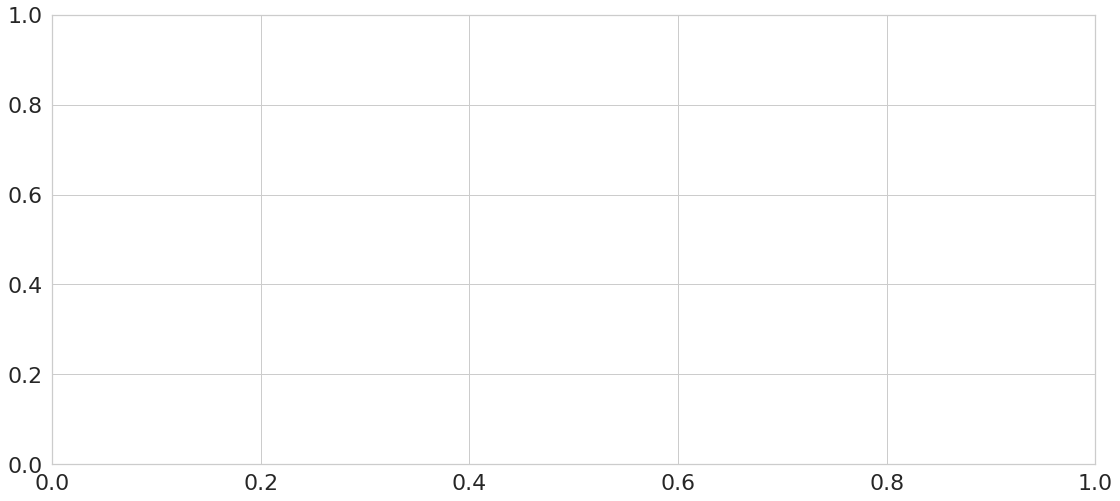

In [164]:
from matplotlib import pyplot
import seaborn

sns.set_style("white")
sns.set_style("whitegrid")



#sns.color_palette("hls", 4)
sns.color_palette("viridis", as_cmap=True)
sns.color_palette("Paired")


chartsize = (18.7, 8.27)

fig, ax = pyplot.subplots(figsize=chartsize)
sns.set(font_scale=2)
sns.axes_style()

sns.set_style("darkgrid", {"axes.facecolor": ".3"})

#sns.barplot( orient='h' ,    data=dfplot)


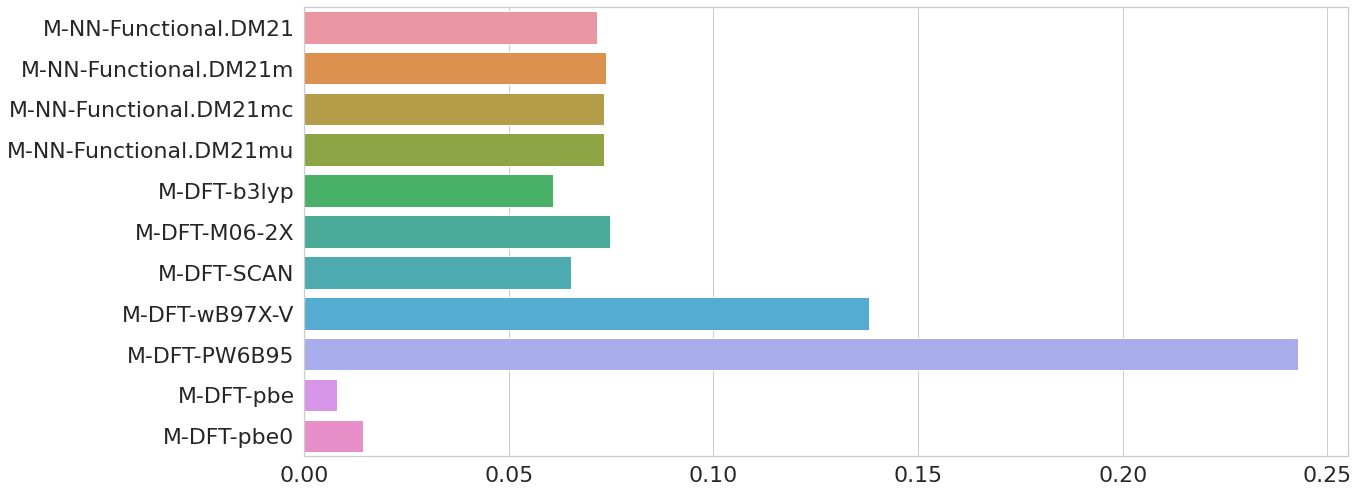

In [165]:
aplot(dfplot[0:1])

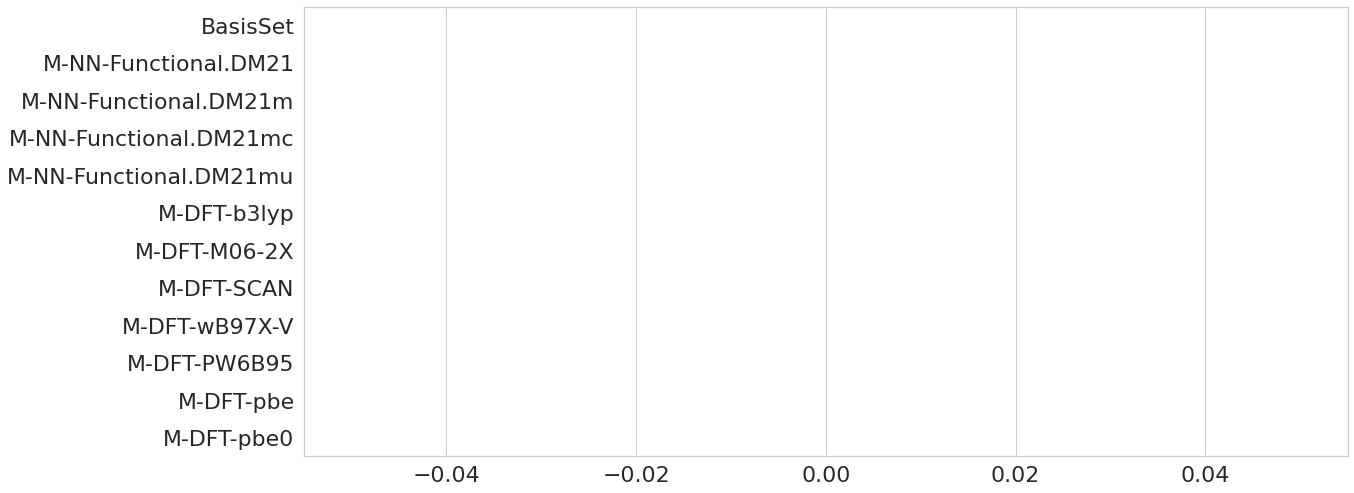

In [166]:
aplot(dfplot[1:2])

In [167]:
listofcolumstoplot2 = ['BasisSet' , 'CCSD',	'CCSDT'	, 'CCSDT_G']
for aDMFunctionalvalue in list(dm21.Functional):
  colname = 'NN-'+ str(aDMFunctionalvalue)
  listofcolumstoplot2.append(colname)


for afunctionals in functionalsList:
  colname = 'DFT-'+str(afunctionals)
  listofcolumstoplot2.append(colname)


listofcolumstoplot2

['BasisSet',
 'CCSD',
 'CCSDT',
 'CCSDT_G',
 'NN-Functional.DM21',
 'NN-Functional.DM21m',
 'NN-Functional.DM21mc',
 'NN-Functional.DM21mu',
 'DFT-b3lyp',
 'DFT-M06-2X',
 'DFT-SCAN',
 'DFT-wB97X-V',
 'DFT-PW6B95',
 'DFT-pbe',
 'DFT-pbe0']

In [168]:
dfplot2 = dfcopy[listofcolumstoplot2]
dfplot2

,BasisSet,CCSD,CCSDT,CCSDT_G,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0
0,cc-pVQZ,-109.442793,-109.46378,-109.46378,-109.535465,-109.537589,-109.537164,-109.537049,-109.524534,-109.538629,-109.529099,-109.60179,-109.706563,-109.455687,-109.449343


In [169]:
dfplot2.min(axis =1, numeric_only=True).min()

-109.70656326177108

In [170]:
dfplot2.max(axis =1, numeric_only=True).max()

-109.44279265870038

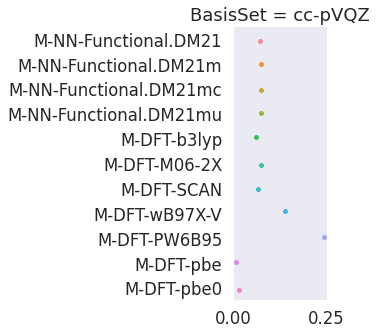

In [171]:
 from matplotlib import pyplot
import seaborn

 

chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot ,  col="BasisSet")


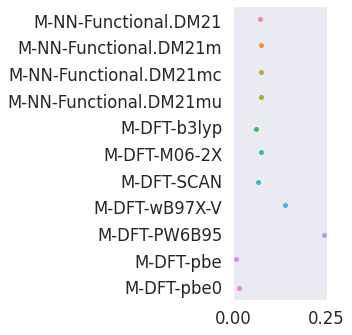

In [172]:
chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot  )

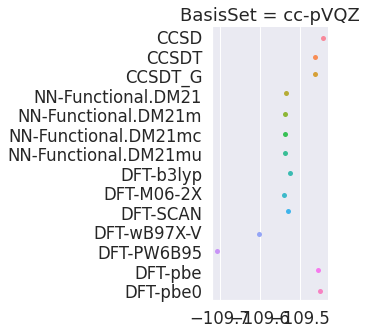

In [173]:
from matplotlib import pyplot
import seaborn

 

chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot2 ,  col="BasisSet")


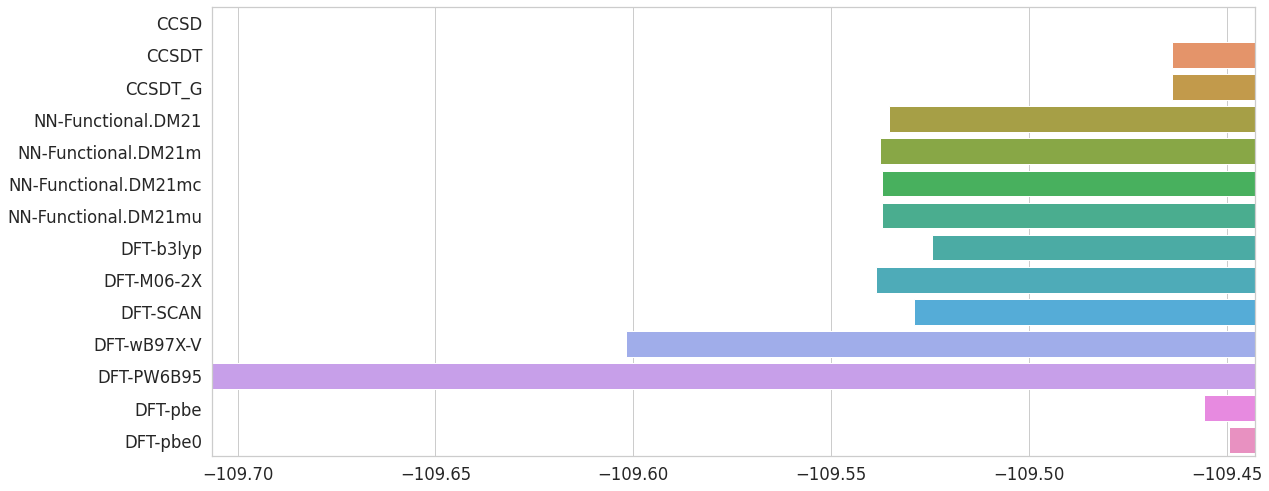

In [174]:
from matplotlib import pyplot
import seaborn

sns.set_style("white")
sns.set_style("whitegrid")



#sns.color_palette("hls", 4)
sns.color_palette("viridis", as_cmap=True)
sns.color_palette("Paired")


chartsize = (18.7, 8.27)

fig, ax = pyplot.subplots(figsize=chartsize)

ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.set(font_scale=2)
sns.axes_style()

sns.set_style("darkgrid", {"axes.facecolor": ".3"})

sns.barplot( orient='h' ,    data=dfplot2)
